In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:
california = fetch_california_housing()

In [5]:
X, y = california.data, california.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()


In [8]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train_scaled, y_train_scaled)


SVR()

In [10]:
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled_2d)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.354150960038132


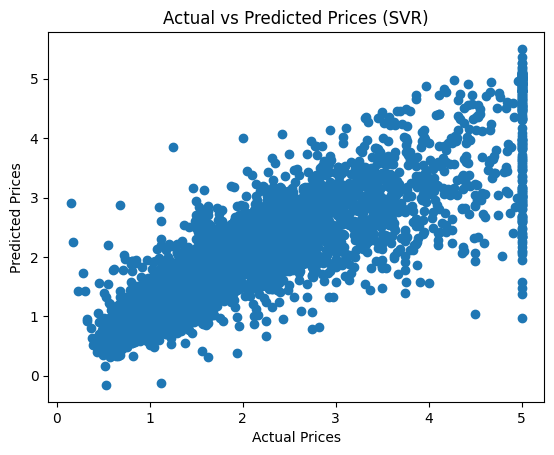

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (SVR)")
plt.show()
